In [1]:
import matplotlib.pyplot as plt
from generators import *

In [2]:
print("CUDA device name:", torch.cuda.is_available())
print(torch.version.cuda)


CUDA device name: True
12.8


In [3]:
boltzman= 1.38e-11 
zeta = 2.26e-9 
T = 300
D = (T*boltzman)/zeta
k = 5e-25
t0=0
total_time = 30
time_step = 4e-3 
x_mu = 0
x0_mean=5
k=2.26e-9 

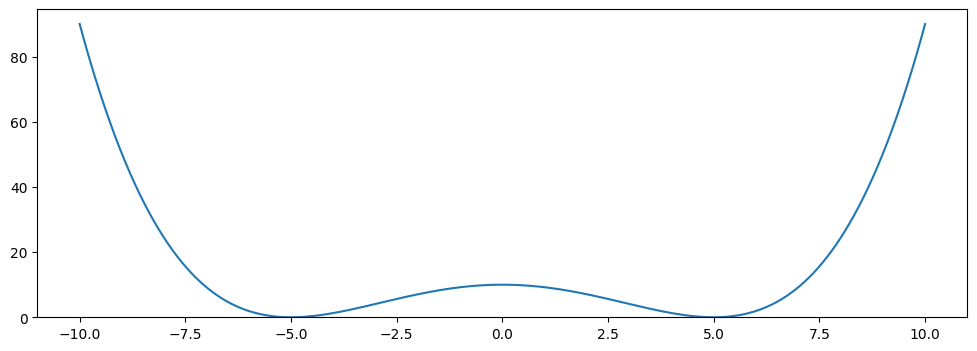

In [10]:
from utils import *


barrier_height= 10
left_well=5
right_well=-5
x0_mean=0
tilt=0#2#2e-50

pos=torch.arange(-10,10,1e-3)
y=graph_potential(pos,barrier_height,left_well=left_well,right_well=right_well,tilt=tilt)
plt.figure(figsize=(12,4))
plt.plot(pos,y)
plt.ylim(0,)
    #plt.xlim(-5,5)
plt.show()

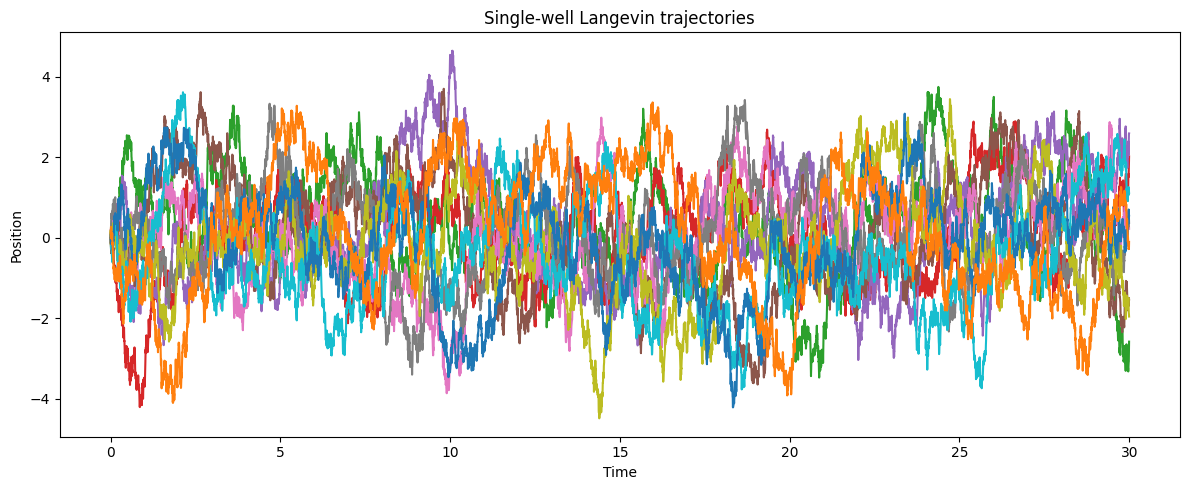

In [5]:

sw,swt=single_well_generator(num_of_simulations=10,total_time=total_time, zeta=zeta,T=T,time_step=time_step,x_mu=x_mu,boltzmann=boltzman,k=k,x0_mean=x0_mean,device='cpu')

plt.figure(figsize=(12, 5))

plt.plot(1, 2, 2)
for i in range(sw.shape[0]):
    plt.plot(swt.cpu().numpy(), sw[i].cpu().numpy())
plt.title("Single-well Langevin trajectories")
plt.xlabel("Time")
plt.ylabel("Position")

plt.tight_layout()
plt.show()


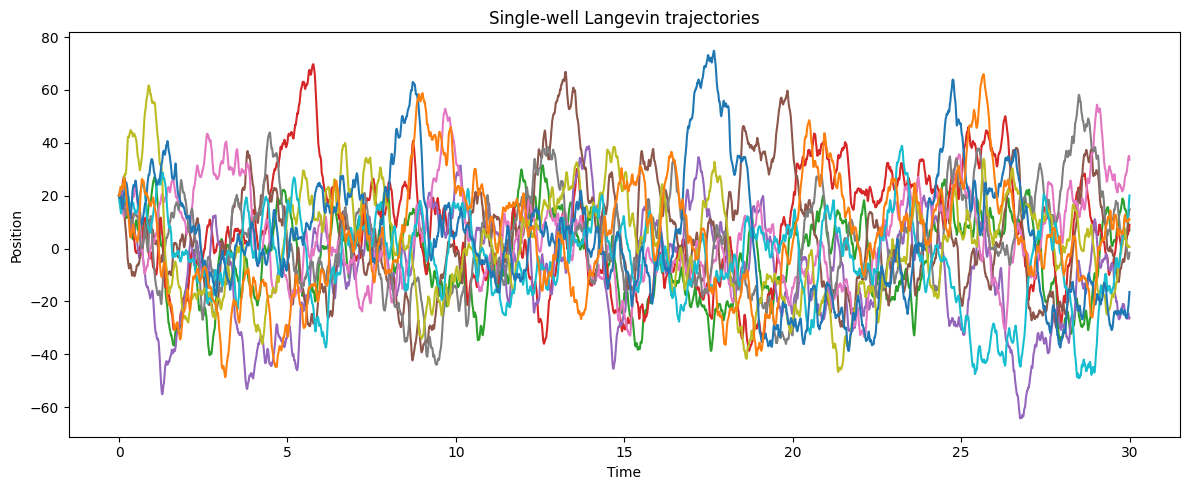

In [6]:
m=1e-10
x0_mean=20
usw,uswv,uswt=single_well_generator_underdamped(m=m,v0_mean=0,num_of_simulations=10,total_time=total_time, zeta=zeta,T=T,time_step=time_step,x_mu=x_mu,boltzmann=boltzman,k=k,x0_mean=x0_mean,device='cpu')

plt.figure(figsize=(12, 5))

plt.plot(1, 2, 2)
for i in range(usw.shape[0]):
    plt.plot(uswt.cpu().numpy(), usw[i].cpu().numpy())
plt.title("Single-well Langevin trajectories")
plt.xlabel("Time")
plt.ylabel("Position")

plt.tight_layout()
plt.show()

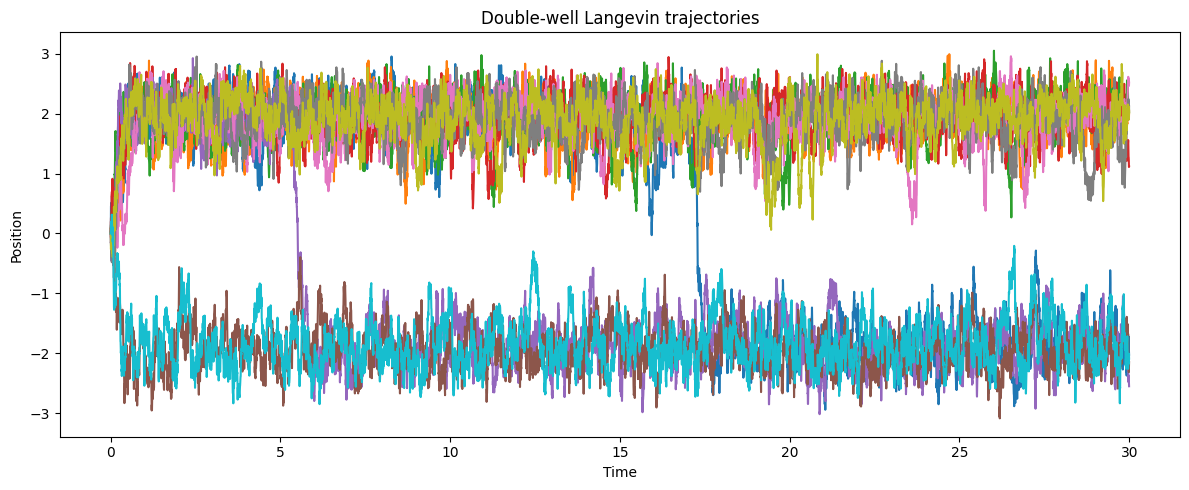

In [7]:
plt.figure(figsize=(12, 5))

barrier_height= 2e-8
left_well=2
right_well=-2
x0_mean=0
tilt=-2e-50
dw,dwt=double_wells_generator(total_time=total_time, zeta=zeta,T=T,time_step=time_step,boltzmann=boltzman,right_well=right_well,left_well=left_well,
                          barrier_height=barrier_height,x0_mean=x0_mean,device='cpu',num_of_simulations=10,tilt=tilt)

for i in range(dw.shape[0]):
    plt.plot(dwt.cpu().numpy(), dw[i].cpu().numpy())
plt.title("Double-well Langevin trajectories")
plt.xlabel("Time")
plt.ylabel("Position")

plt.tight_layout()
plt.show()